In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fanalysis.mca import MCA
from factor_analyzer import FactorAnalyzer

In [41]:
#df_mca.to_csv("df_mca.csv",sep=',',na_rep='NaN')

In [2]:
'''
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\Ghost\Full Data Cleaned\ZY_Ghost_full_V3.csv")
df = df.drop(df.columns[0], axis=1)

df['DATSOR'] = pd.to_datetime(df['DATSOR'],format='ISO8601')
df['DATENT'] = pd.to_datetime(df['DATENT'],format='ISO8601')

df['DATDEB'] = pd.to_datetime(df['DATDEB'],format='ISO8601')
df['DATFIN'] = pd.to_datetime(df['DATFIN'],format='ISO8601')

df['PHYSOR'] = pd.to_datetime(df['PHYSOR'],format='ISO8601')
df['DTECHE'] = pd.to_datetime(df['DTECHE'],format='ISO8601')
'''

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_115932\3136527978.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Ghost\ZY_Ghost_full_noNan_NEW.csv")


In [7]:
df_mca = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\2. Data Analysis\MCA\Ghost Worker\MCA_data_ghost\df_mca.csv")
df_mca = df_mca.drop(df_mca.columns[0], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16460\503712241.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mca = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\2. Data Analysis\MCA\Ghost Worker\df_mca.csv")


In [4]:
#df_mca= pd.DataFrame()

# MCA Treatments relative to Original DataBase

In [19]:

df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Ghost\ZY_Ghost_23_V7_restreint.csv")
df = df.drop(df.columns[0], axis=1)

df['DATSOR'] = pd.to_datetime(df['DATSOR'])
df['DATENT'] = pd.to_datetime(df['DATENT'])

df['DATDEB'] = pd.to_datetime(df['DATDEB'])
df['DATFIN'] = pd.to_datetime(df['DATFIN'])

df['PHYSOR'] = pd.to_datetime(df['PHYSOR'])
df['DTECHE'] = pd.to_datetime(df['DTECHE'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_83120\96305506.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Ghost\ZY_Ghost_23_V7_restreint.csv")


In [14]:
cols_all = df.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [16]:
df_mca.shape

(961540, 16)

In [21]:
df.values.shape

(766123, 40)

# MCA DataFrame

In [21]:
#df_mca.to_csv("MCA_Ghost_23.csv",sep=',',na_rep='NaN')

In [22]:
#df_mca.drop('RSSTDE',axis=1, inplace=True)

In [33]:
df_mca.drop('Leave_Category',axis=1,inplace=True)

In [12]:
X = df_mca.iloc[:,1:13].values

In [13]:
my_mca = MCA(n_components=3) 

In [14]:
len(X)
# batch = 100000 - 1:6 cols
# 70000 - 1:12

961540

In [16]:
batch_size = 100550  # 1/10 des données totales

for i in range(0, len(X), batch_size):
    batch_data = X[i:i+batch_size]
    my_mca.fit(batch_data)
    print(f'done {i}')

done 0
done 100550
done 201100
done 301650
done 402200
done 502750
done 603300
done 703850
done 804400
done 904950


In [17]:
my_mca.eig_

array([[ 0.30211788,  0.16840278,  0.16529341],
       [ 4.83388602,  2.6944445 ,  2.64469457],
       [ 4.83388602,  7.52833052, 10.17302509]])

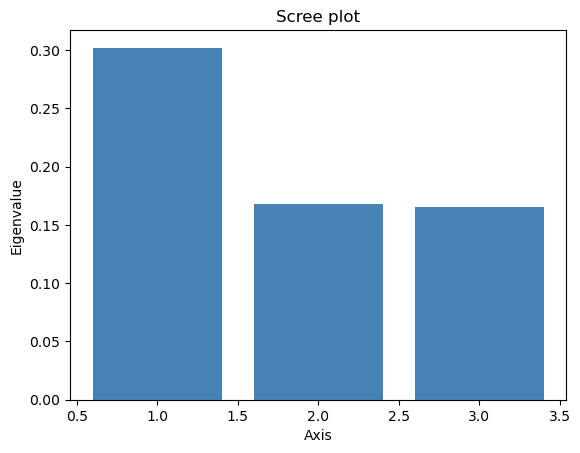

In [18]:
my_mca.plot_eigenvalues()

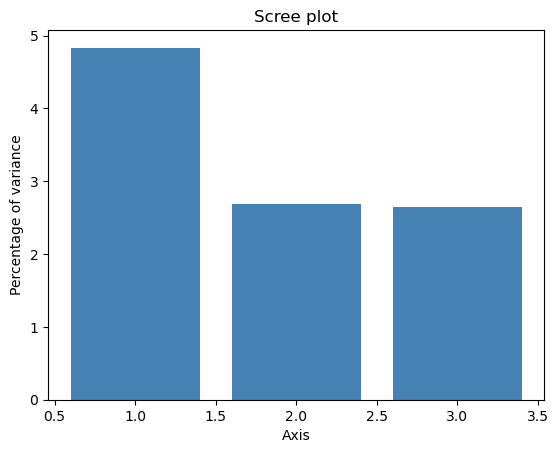

In [19]:
my_mca.plot_eigenvalues(type="percentage")

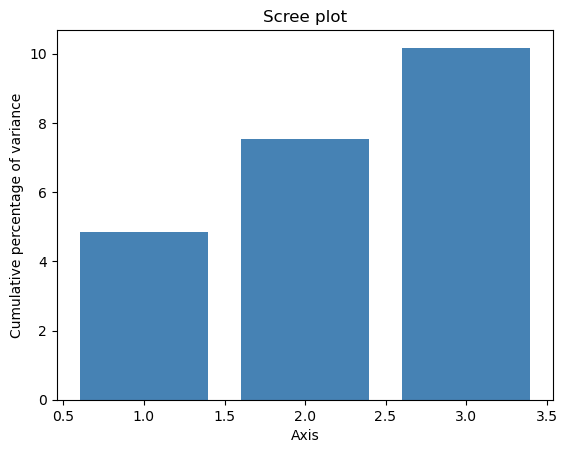

In [93]:
my_mca.plot_eigenvalues(type="cumulative")

## Statistics extraction Line point

In [20]:
df_rows = my_mca.row_topandas()

In [21]:
df_rows

row_coord_dim1  row_coord_dim2  row_coord_dim3  row_contrib_dim1  \
row0           -1.170268       -0.113596        0.136229          0.008010   
row1           -1.216854       -0.051031        0.084405          0.008661   
row2           -1.101237       -0.030352        0.055348          0.007093   
row3           -1.170268       -0.113596        0.136229          0.008010   
row4           -1.101237       -0.030352        0.055348          0.007093   
...                  ...             ...             ...               ...   
row56585        0.347701        0.220537       -0.200022          0.000707   
row56586        0.417012        0.316722       -0.278060          0.001017   
row56587        0.417328        0.318059       -0.279215          0.001019   
row56588        0.417336        0.318081       -0.279233          0.001019   
row56589        0.417343        0.318103       -0.279252          0.001019   

          row_contrib_dim2  row_contrib_dim3  row_cos2_dim1  row_cos2_dim2  \
row0              0.000135          0.000198       0.186782       0.001760   
row1              0.000027          0.000076       0.164466       0.000289   
row2              0.000010          0.000033       0.165515       0.000126   
row3              0.000135          0.000198       0.186782       0.001760   
row4              0.000010          0.000033       0.165515       0.000126   
...                    ...               ...            ...            ...   
row56585          0.000510          0.000428       0.040110       0.016136   
row56586          0.001053          0.000827       0.056304       0.032479   
row56587          0.001062          0.000833       0.056389       0.032753   
row56588          0.001062          0.000834       0.056391       0.032758   
row56589          0.001062          0.000834       0.056393       0.032763   

          row_cos2_dim3  
row0           0.002531  
row1           0.000791  
row2           0.000418  
row3           0.002531  
row4           0.000418  
...                 ...  
row56585       0.013274  
row56586       0.025033  
row56587       0.025242  
row56588       0.025245  
row56589       0.025248  

[56590 rows x 9 columns]

In [22]:
col_coord = pd.DataFrame(my_mca.col_coord_)
col_coord

0         1         2
0   0.117241  0.145305 -0.103907
1  -0.080120 -0.099298  0.071007
2  -0.167985 -0.146486  0.116042
3   0.242752  0.212748 -0.168651
4   0.213016 -0.496879  0.469604
..       ...       ...       ...
82  0.288707 -0.076929  0.122240
83 -0.518532  0.095651 -0.050880
84  0.248874 -2.559430  2.474727
85  0.244055  0.197483 -0.192642
86  0.260596 -0.463732  0.430225

[87 rows x 3 columns]

In [23]:
my_mca.row_contrib_

array([[8.01040718e-03, 1.35405425e-04, 1.98401988e-04],
       [8.66085356e-03, 2.73258908e-05, 7.61625116e-05],
       [7.09325682e-03, 9.66674980e-06, 3.27497749e-05],
       ...,
       [1.01868379e-03, 1.06151270e-03, 8.33453549e-04],
       [1.01872002e-03, 1.06166196e-03, 8.33564381e-04],
       [1.01875625e-03, 1.06181122e-03, 8.33675221e-04]])

In [24]:
my_mca.row_cos2_

array([[1.86781684e-01, 1.75990245e-03, 2.53107394e-03],
       [1.64465716e-01, 2.89242329e-04, 7.91288876e-04],
       [1.65515324e-01, 1.25732004e-04, 4.18099801e-04],
       ...,
       [5.63893158e-02, 3.27533302e-02, 2.52416621e-02],
       [5.63913214e-02, 3.27579355e-02, 2.52450188e-02],
       [5.63933271e-02, 3.27625411e-02, 2.52483756e-02]])

## Statistics extraction Column point

In [25]:
df_cols = my_mca.col_topandas()

In [26]:
df_cols

col_coord_dim1  col_coord_dim2  col_coord_dim3  \
col0_Mr                    0.117241        0.145305       -0.103907   
col0_Mrs                  -0.080120       -0.099298        0.071007   
col1_No Deposit           -0.167985       -0.146486        0.116042   
col1_Physic_deposit        0.242752        0.212748       -0.168651   
col1_Scan_Validated        0.213016       -0.496879        0.469604   
...                             ...             ...             ...   
col11_CSO                  0.288707       -0.076929        0.122240   
col11_CSS                 -0.518532        0.095651       -0.050880   
col11_MAB                  0.248874       -2.559430        2.474727   
col11_MAN                  0.244055        0.197483       -0.192642   
col11_MAT                  0.260596       -0.463732        0.430225   

                     col_contrib_dim1  col_contrib_dim2  col_contrib_dim3  \
col0_Mr                      0.153916          0.424141          0.220967   
col0_Mrs                     0.105182          0.289847          0.151003   
col1_No Deposit              0.459989          0.627521          0.401200   
col1_Physic_deposit          0.663815          0.914704          0.585629   
col1_Scan_Validated          0.000796          0.007772          0.007073   
...                               ...               ...               ...   
col11_CSO                    0.025026          0.003188          0.008200   
col11_CSS                    0.333929          0.020385          0.005877   
col11_MAB                    0.000543          0.103107          0.098209   
col11_MAN                    0.784765          0.921832          0.893695   
col11_MAT                    0.001754          0.009966          0.008740   

                     col_cos2_dim1  col_cos2_dim2  col_cos2_dim3  
col0_Mr                   0.009393       0.014429       0.007378  
col0_Mrs                  0.009393       0.014429       0.007378  
col1_No Deposit           0.040771       0.031003       0.019455  
col1_Physic_deposit       0.040679       0.031245       0.019635  
col1_Scan_Validated       0.000029       0.000157       0.000140  
...                            ...            ...            ...  
col11_CSO                 0.000917       0.000065       0.000164  
col11_CSS                 0.012677       0.000431       0.000122  
col11_MAB                 0.000020       0.002084       0.001949  
col11_MAN                 0.054469       0.035664       0.033937  
col11_MAT                 0.000064       0.000202       0.000174  

[87 rows x 9 columns]

In [27]:
df_cols.iloc[13,:]

col_coord_dim1      -2.511349
col_coord_dim2       0.345779
col_coord_dim3      -0.276786
col_contrib_dim1    22.360942
col_contrib_dim2     0.760500
col_contrib_dim3     0.496460
col_cos2_dim1        0.930250
col_cos2_dim2        0.017635
col_cos2_dim3        0.011300
Name: col4_Mutation, dtype: float64

In [28]:
col_coord = pd.DataFrame(my_mca.col_coord_)
col_coord

0         1         2
0   0.117241  0.145305 -0.103907
1  -0.080120 -0.099298  0.071007
2  -0.167985 -0.146486  0.116042
3   0.242752  0.212748 -0.168651
4   0.213016 -0.496879  0.469604
..       ...       ...       ...
82  0.288707 -0.076929  0.122240
83 -0.518532  0.095651 -0.050880
84  0.248874 -2.559430  2.474727
85  0.244055  0.197483 -0.192642
86  0.260596 -0.463732  0.430225

[87 rows x 3 columns]

In [29]:
col_contrib = pd.DataFrame(my_mca.col_contrib_)
col_contrib

0         1         2
0   0.153916  0.424141  0.220967
1   0.105182  0.289847  0.151003
2   0.459989  0.627521  0.401200
3   0.663815  0.914704  0.585629
4   0.000796  0.007772  0.007073
..       ...       ...       ...
82  0.025026  0.003188  0.008200
83  0.333929  0.020385  0.005877
84  0.000543  0.103107  0.098209
85  0.784765  0.921832  0.893695
86  0.001754  0.009966  0.008740

[87 rows x 3 columns]

In [30]:
col_contrib.describe()

0          1          2
count  87.000000  87.000000  87.000000
mean    1.149425   1.149425   1.149425
std     4.027121   3.236951   3.636396
min     0.000044   0.000087   0.000003
25%     0.002579   0.020188   0.008744
50%     0.034210   0.097898   0.073227
75%     0.250710   0.760500   0.546570
max    22.360942  22.430113  27.526973

In [33]:
L1 = [ i for i in range(87) if col_contrib.iloc[i,0]>=22.360942]
L2 = [ i for i in range(87) if col_contrib.iloc[i,1]>=22.43011]
L3 = [ i for i in range(87) if col_contrib.iloc[i,2]>=27.52697]
print(L1,L2,L3)

[13, 46] [5] [5]


In [36]:
df_cols.iloc[5,:]

col_coord_dim1      -1.224549
col_coord_dim2     -56.624690
col_coord_dim3     -62.147330
col_contrib_dim1     0.005847
col_contrib_dim2    22.430113
col_contrib_dim3    27.526973
col_cos2_dim1        0.000212
col_cos2_dim2        0.453339
col_cos2_dim3        0.546080
Name: col2_F, dtype: float64

______________________________________________________________________________________
#### **Interpretation( with seniority duration)**
- col4_Mutation & col7_ORGANI have maximum contribution to the 1st Dimension
- col4_Currently IN has maximum contribution to the 2nd Dimension

#### **Interpretation( without seniority duration)**
- col4_Mutation & col7_ORGANI have maximum contribution to the 1st Dimension
- col2_F IN has maximum contribution to the 2nd Dimension

______________________________________________________________________________________

### b. Correlation of variables with the axis 

In [71]:
col_cos2 = pd.DataFrame(my_mca.col_cos2_)
col_cos2

0         1         2
0    0.008160  0.015856  0.016399
1    0.008160  0.015856  0.016399
2    0.036966  0.025088  0.000020
3    0.036875  0.025327  0.000021
4    0.000031  0.000195  0.000001
..        ...       ...       ...
571  0.000039  0.001085  0.001460
572  0.000002  0.000674  0.002442
573  0.000401  0.001063  0.002487
574  0.000119  0.001171  0.001726
575  0.000039  0.015095  0.003872

[576 rows x 3 columns]

In [72]:
col_cos2.describe()

0             1             2
count  5.760000e+02  5.760000e+02  5.760000e+02
mean   1.231735e-02  7.347177e-03  5.094562e-03
std    8.717291e-02  5.247080e-02  3.772651e-02
min    2.365259e-08  6.621655e-09  2.320895e-09
25%    1.001279e-04  3.485462e-04  5.343756e-05
50%    3.234179e-04  9.159531e-04  2.234736e-04
75%    9.006335e-04  2.307997e-03  6.812816e-04
max    9.301296e-01  8.455836e-01  4.665046e-01

## Graphic

### SENiority_DURation included

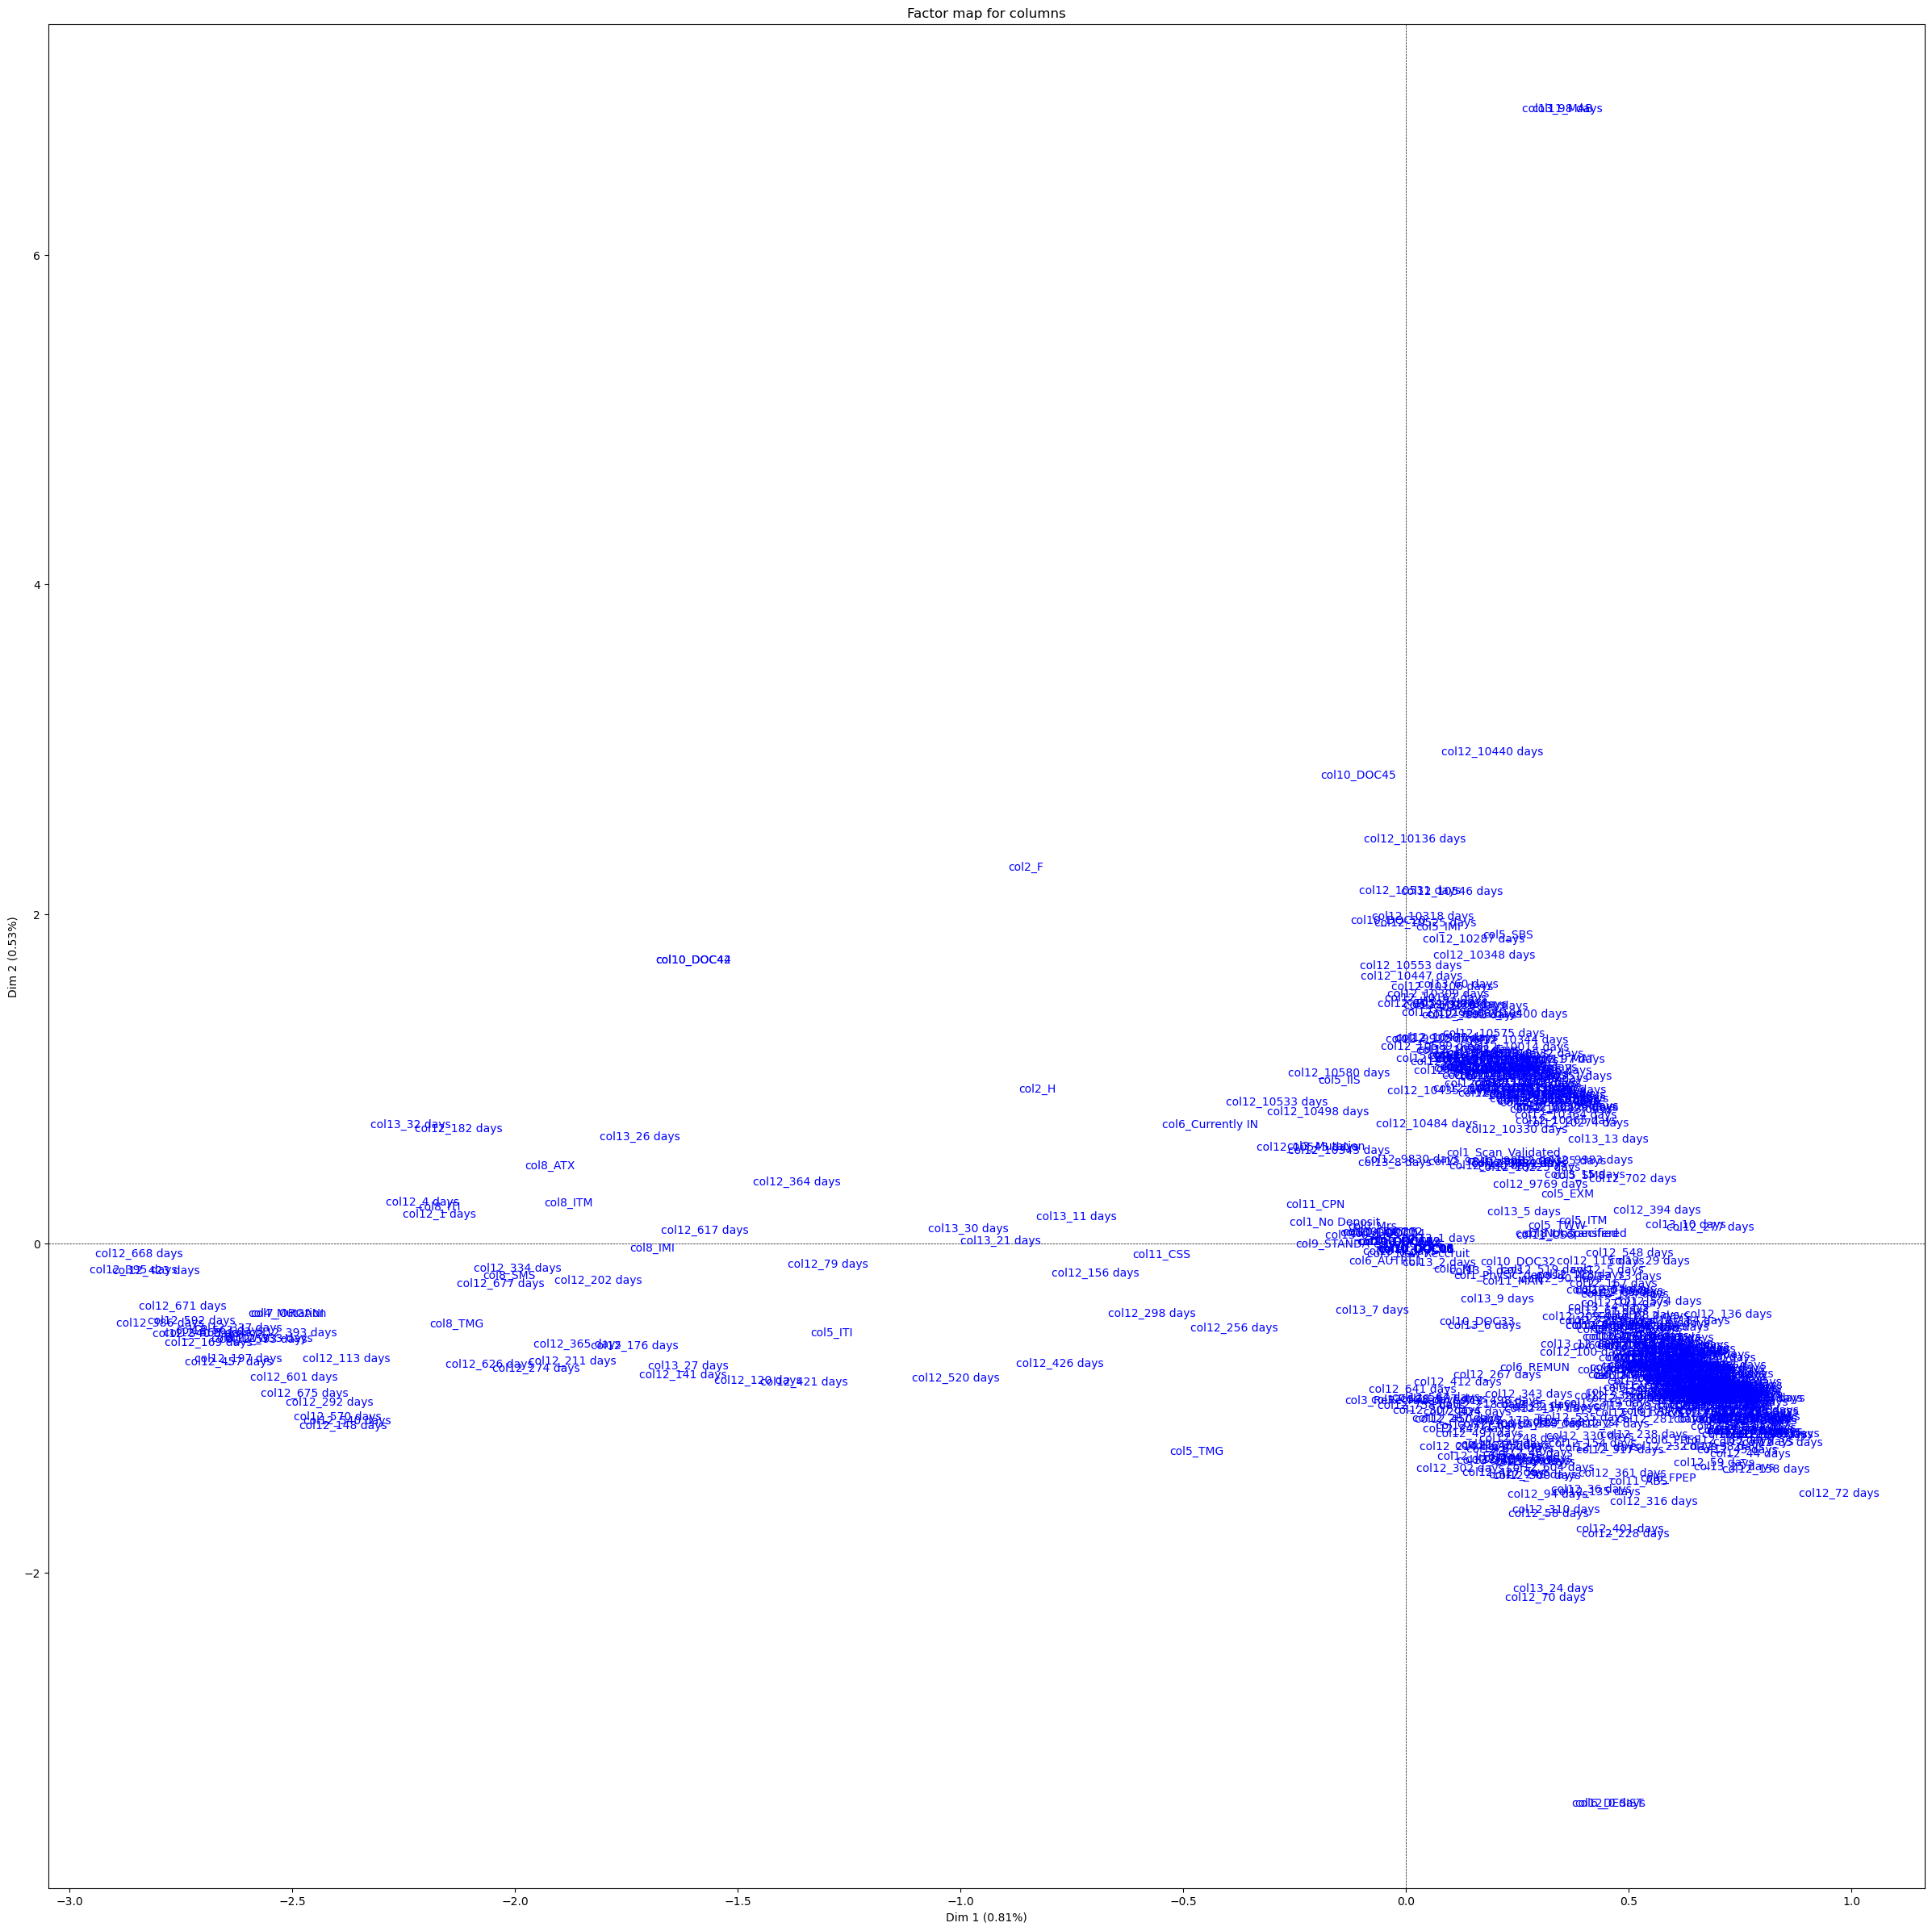

<Figure size 640x480 with 0 Axes>

In [83]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(30, 30))
plt.savefig('Factor_Map_col.png')

In [84]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(100, 100))
plt.savefig('Factor_Map_col_100.png')

<Figure size 640x480 with 0 Axes>

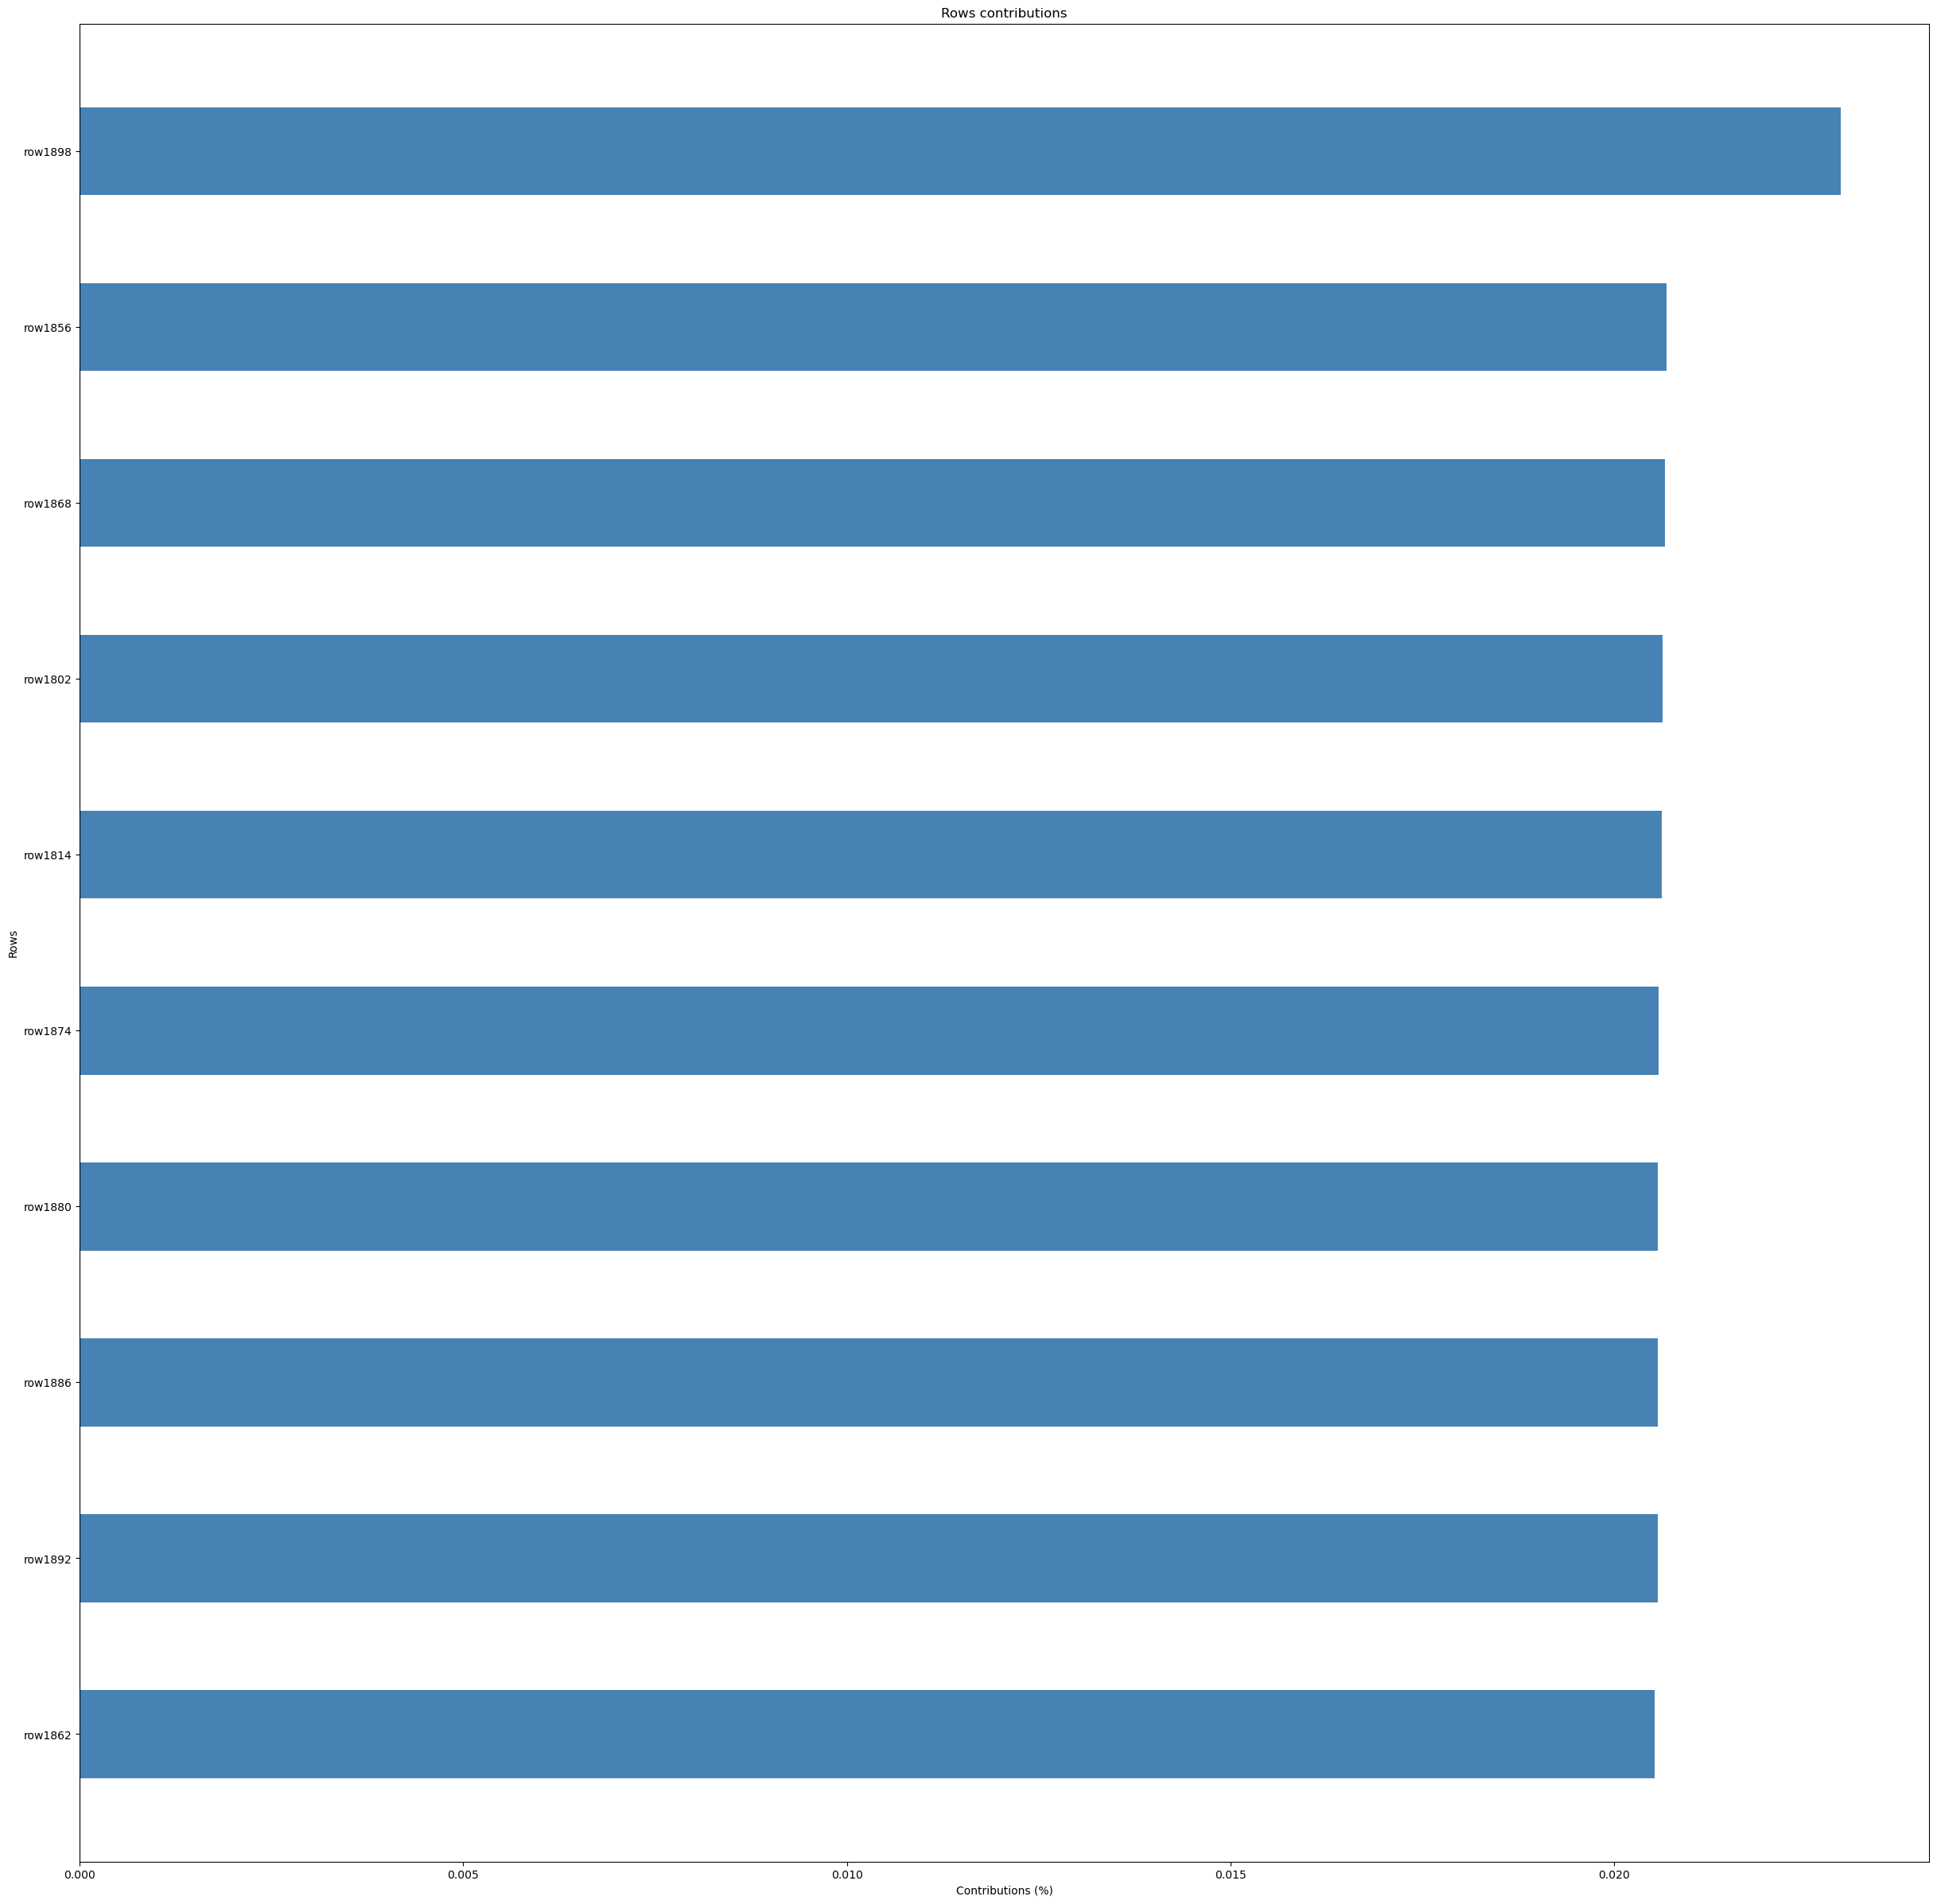

In [76]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10, figsize=(30, 30))

### SENiority_DURation NOT included

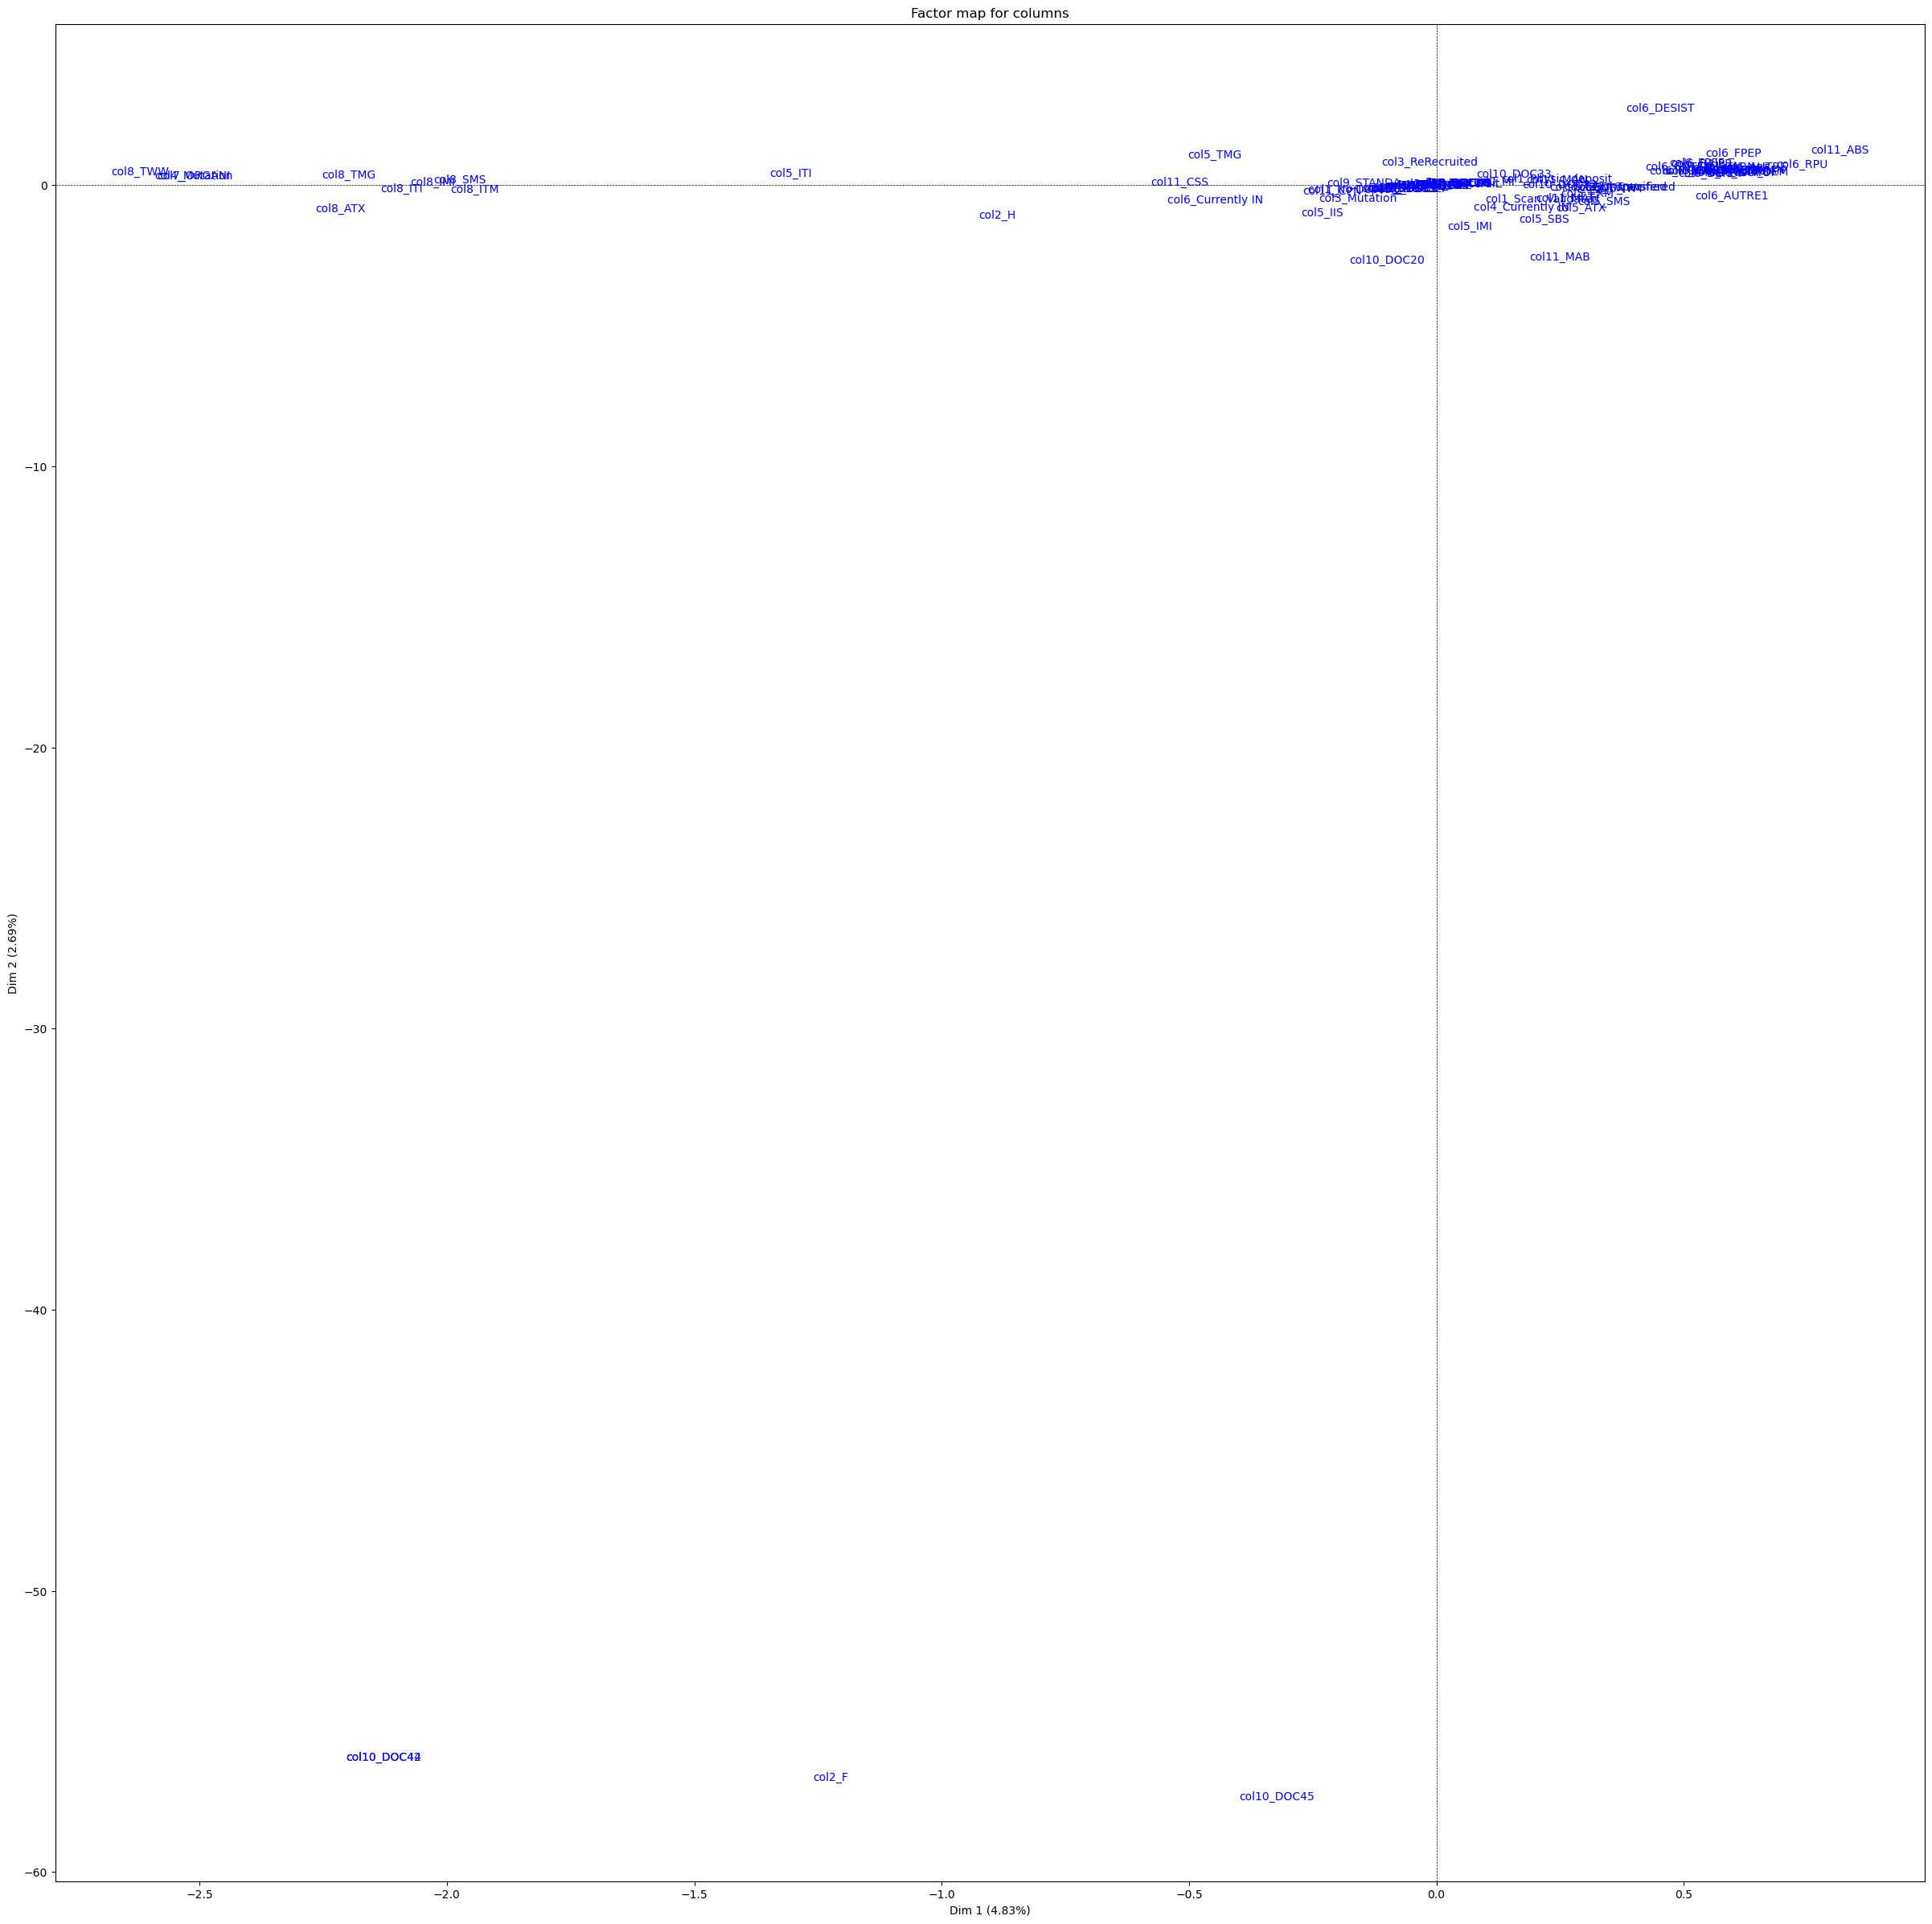

<Figure size 640x480 with 0 Axes>

In [115]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(30, 30))
plt.savefig('Factor_Map_col_1.png')

- **Document type** : 42 & 44 are superposed
- **Document type** 42 , 44 & 45 score highest on **Deposit platform** : **F**
___
- **Transfer company**: TMG, ATX, ITI, IMI, SMS, ITM are closest to eachother, and score highest on the 'Mutation axis'
- **Transfer company**: col8 : **TWW** scores highest on the 'Mutation axis', and is closest to **Mutation & Internal Organisation reasons for transfer**
___
- **Current company** : TMG , **Absense Code** : CSS, **Leave_Category** : CurrentlyIN are closest to eachother
____
- No_Deposit , Mutation , **Absense Code** :  CPN , STANDA , **Current company** : IIS , **Document type**: DOC20  & **Entry Category** : **ReRecruited** are closest to eachother

____
- Mr & DOC33 are closest to eachother
- CurrentlyIn , Scan_Validated ,  **Current company** : SBS , **Absense Code** : MAT
- **Absense Code** : CSO , DOC32,  **Current company** : EXM SMS ATX
- **Absense Code** : MAB & **Current company** : SBS
____
Concerning Leave_Reason : 
- **Leave_Reason : RPU** contributes most to the Mutation axis
- **ABS : Unjustified Absence** contributes most to the Mutation axis
- **DESIST** is farthest from the absence reasons cluster.
- Most absence reasons are very close to eachother, if we were to make associations :
- CNTFM, MOFNO, FPEF, RAIPR, DEPET
- FINCTR, MALGR, ABN,
- MOFOF, REMUN, ABF, PBMAN, autre, DEM

In [41]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(100, 100))
plt.savefig('Factor_Map_col_1.png')

<Figure size 640x480 with 0 Axes>

In [44]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(200, 200))
plt.savefig('Factor_Map_col_1.png')

<Figure size 640x480 with 0 Axes>